In [31]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import math
from math import sqrt
import os
from pathlib import Path
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [32]:
# Identify companies with incomplete data from original S&P 500 dataset

full_path = os.path.abspath(os.curdir)
stock_data_url = str(Path(full_path).parents[0])+"\datasets\Stock Data/"
sp_data = "S&P_500_stock_data.csv"
spdata = pd.read_csv(stock_data_url + sp_data)

spdata.describe()

spdata1 = spdata[spdata.isna().any(axis=1)]
print(spdata1['Name'].drop_duplicates().to_list())


['Carrier Global', 'Lumen Technologies', 'Otis Worldwide', 'ViacomCBS', 'Vontier']


In [33]:
# S&P 500 Companies - Joined Stock Prces and Industries

full_path = os.path.abspath(os.curdir)
stock_data_url = str(Path(full_path).parents[0])+"\datasets\Stock Data\Spark_joins/"
sp_sectors = "spjoin_sectors.csv"


spsec = pd.read_csv(stock_data_url + sp_sectors, header=None)

spsec.columns = ["Symbol", "Name", "Date", "Daily Return", "Log Return", "Close", "Adj Close",
                 "High", "Low", "Open", "Volume","GICS Sector", "GICS Sub-Industry", 
                 "HQ Location", "Date first added", "CIK", "Founded"]

spsec = spsec.set_index(['Date'])

#Filter out companies with incomplete data
incomplete = ['Carrier Global', 'Lumen Technologies', 'Otis Worldwide', 'ViacomCBS', 'Vontier']
spsec = spsec[~spsec['Name'].isin(incomplete)] 

spsec.head()
spsec.count()


Symbol               126000
Name                 126000
Daily Return         126000
Log Return           126000
Close                126000
Adj Close            126000
High                 126000
Low                  126000
Open                 126000
Volume               126000
GICS Sector          126000
GICS Sub-Industry    126000
HQ Location          126000
Date first added     112644
CIK                  126000
Founded              126000
dtype: int64

In [34]:
#Cluster analysis for Consumer Discretionary
spdis = spsec[spsec['GICS Sector']=='Consumer Discretionary']

#Calculating annual returns and variances
returns = spdis.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = spdis.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()


,GICS Sub-Industry,returns,variances
Name,,,
Advance Auto Parts,Automotive Retail,-0.054710,0.471841
Amazon-com Inc-,Internet & Direct Marketing Retail,0.587061,0.384036
Aptiv PLC,Auto Parts & Equipment,0.174509,0.748234
AutoZone Inc,Specialty Stores,-0.013817,0.420143
Best Buy Co- Inc-,Computer & Electronics Retail,0.393853,0.519512


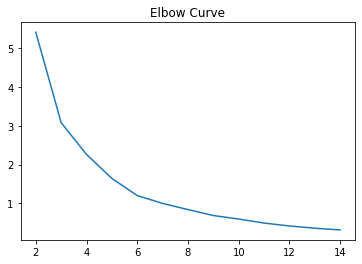

In [35]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

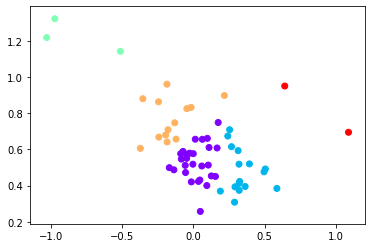

In [36]:
# Plotting clusters

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [37]:
# Creating datafrane with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[ 0.01845584  0.52844165]
 [ 0.34298055  0.47820574]
 [-0.83846194  1.22677243]
 [-0.15776213  0.76616108]
 [ 0.86603084  0.82199809]]


,Group
Name,
Advance Auto Parts,0
Amazon-com Inc-,1
Aptiv PLC,0
AutoZone Inc,0
Best Buy Co- Inc-,1


In [38]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\consumer_discretionary_groups.csv',header=True)

In [39]:
# Counts and Filters

print(df.groupby("Group").count() )
df.loc[df["Group"] == 2]


Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]


,Group
Name,
Carnival Corp-,2
Norwegian Cruise Line Holdings,2
Royal Caribbean Group,2


In [40]:
#Cluster analysis for Communication Services
spcom = spsec[spsec['GICS Sector']=='Communication Services']

#Calculating annual returns and variances
returns = spcom.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = spcom.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()


,GICS Sub-Industry,returns,variances
Name,,,
AT&T Inc-,Integrated Telecommunication Services,-0.312113,0.354819
Activision Blizzard,Interactive Home Entertainment,0.372363,0.387221
Alphabet Inc- (Class A),Interactive Media & Services,0.284418,0.383581
Alphabet Inc- (Class C),Interactive Media & Services,0.286104,0.382300
Charter Communications,Cable & Satellite,0.308063,0.348762


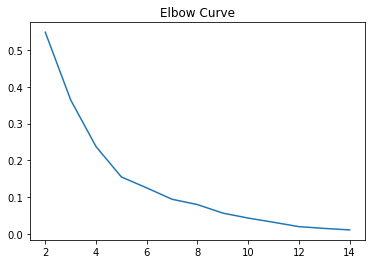

In [41]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

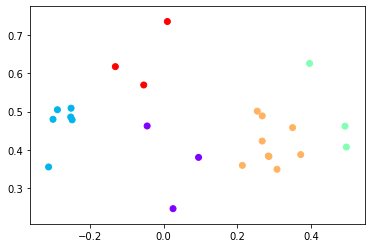

In [42]:
# Plotting clusters

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [43]:
# Creating dataframe with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[ 0.02536669  0.36256986]
 [-0.27530525  0.46869444]
 [ 0.4617498   0.49828267]
 [ 0.28946669  0.41459447]
 [-0.05811569  0.64113457]]


,Group
Name,
AT&T Inc-,1
Activision Blizzard,3
Alphabet Inc- (Class A),3
Alphabet Inc- (Class C),3
Charter Communications,3


In [44]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\communication_services_groups.csv',header=True)

In [45]:
#Cluster analysis for Technology
sptech = spsec[spsec['GICS Sector']=='Information Technology']

sptech.head()

#Calculating annual returns and variances
returns = sptech.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = sptech.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()


,GICS Sub-Industry,returns,variances
Name,,,
ANSYS,Application Software,0.333430,0.455496
Accenture plc,IT Consulting & Other Services,0.205789,0.408696
Adobe Inc-,Application Software,0.455913,0.477916
Advanced Micro Devices Inc,Semiconductors,0.747528,0.612498
Akamai Technologies Inc,Internet Services & Infrastructure,0.146318,0.384187


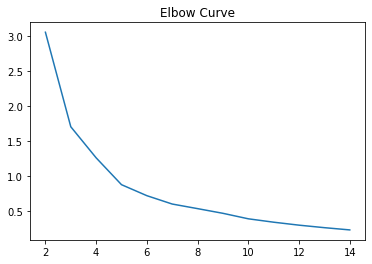

In [46]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

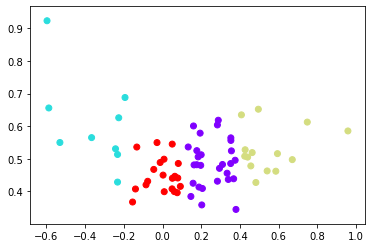

In [47]:
# Plotting clusters

kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [48]:
# Creating dataframe with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[ 2.55304409e-01  4.85525478e-01]
 [-3.56545338e-01  6.08867086e-01]
 [ 5.49050754e-01  5.27562067e-01]
 [ 2.92546398e-04  4.49117064e-01]]


,Group
Name,
ANSYS,0
Accenture plc,0
Adobe Inc-,2
Advanced Micro Devices Inc,2
Akamai Technologies Inc,0


In [49]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\information_technology_groups.csv',header=True)

In [50]:
#Cluster analysis for Health Care
sphealth = spsec[spsec['GICS Sector']=='Health Care']

sphealth.head()

#Calculating annual returns and variances
returns = sphealth.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = sphealth.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()


,GICS Sub-Industry,returns,variances
Name,,,
ABIOMED Inc,Health Care Equipment,0.197967,0.513864
AbbVie Inc-,Pharmaceuticals,0.111053,0.348419
Abbott Laboratories,Health Care Equipment,0.272872,0.389917
Agilent Technologies Inc,Health Care Equipment,0.341988,0.361440
Alexion Pharmaceuticals,Biotechnology,0.164602,0.405905


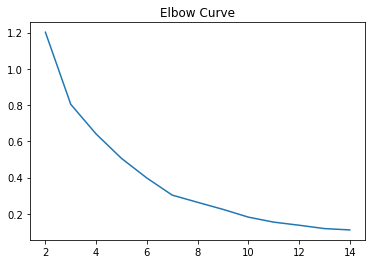

In [51]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

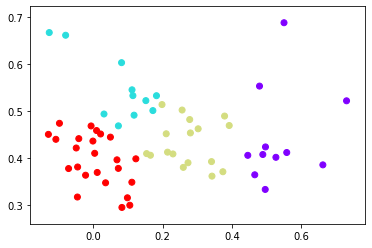

In [52]:
# Plotting clusters

kmeans = KMeans(n_clusters = 4).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [53]:
# Creating dataframe with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[0.53585094 0.44509782]
 [0.07503939 0.54722959]
 [0.27313588 0.43264981]
 [0.00710634 0.39504316]]


,Group
Name,
ABIOMED Inc,2
AbbVie Inc-,3
Abbott Laboratories,2
Agilent Technologies Inc,2
Alexion Pharmaceuticals,2


In [54]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\health_care_groups.csv',header=True)

In [55]:
#Cluster analysis for Financial Services
spfin = spsec[spsec['GICS Sector']=='Financials']

spfin.head()

#Calculating annual returns and variances
returns = spfin.groupby(['Name', 'GICS Sub-Industry']).mean()*252
variances = spfin.groupby(['Name', 'GICS Sub-Industry']).std()*sqrt(252)

returns = returns['Log Return']
variances = variances['Log Return']

clusters = pd.concat([(returns), (variances)], 
                      axis = 'columns', join = 'inner')

clusters.columns = ["returns", "variances"]

clusters=clusters.reset_index()
clusters = clusters.set_index('Name')

clusters.head()

,GICS Sub-Industry,returns,variances
Name,,,
AFLAC Inc,Life & Health Insurance,-0.270189,0.574550
Allstate Corp,Property & Casualty Insurance,-0.138714,0.431883
American Express Co,Consumer Finance,-0.048960,0.626504
American International Group,Property & Casualty Insurance,-0.368158,0.715119
Ameriprise Financial,Asset Management & Custody Banks,0.143471,0.689150


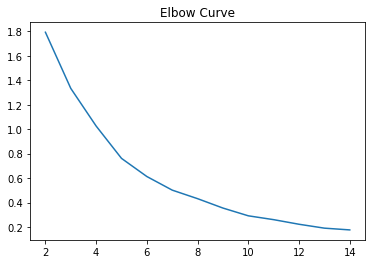

In [56]:
# Determining number of clusters

X= clusters[['returns', 'variances']].values #converting into numpy array
sse =[]
for k in range (2,15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    
pl.plot(range(2,15),sse)
pl.title("Elbow Curve")
pl.show()

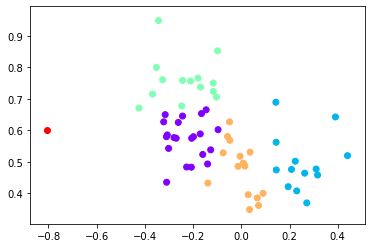

In [57]:
# Plotting clusters

kmeans = KMeans(n_clusters = 5).fit(X)
centroids = kmeans.cluster_centers_
pl.scatter(X[:,0], X[:,1],c = kmeans.labels_,cmap="rainbow")
pl.show()

In [58]:
# Creating dataframe with companies and corresponding cluster

print(centroids)

Company = pd.DataFrame(clusters.index)
cluster_labels = pd.DataFrame(kmeans.labels_)
df=pd.concat([Company,cluster_labels],axis=1)
df.columns = ["Name","Group"]
df=df.set_index(['Name'])
df.head()

[[-0.22692742  0.57235469]
 [ 0.2525014   0.49667066]
 [-0.23565796  0.75870466]
 [-0.00157675  0.47681141]
 [-0.80430721  0.59903428]]


,Group
Name,
AFLAC Inc,0
Allstate Corp,3
American Express Co,3
American International Group,2
Ameriprise Financial,1


In [59]:
#Dataset for visualization

combined = pd.concat([(clusters), (df)], 
                      axis = 'columns', join = 'inner')
combined.head()
combined.to_csv (r'..\data-analysis\financial_services_groups.csv',header=True)